<a href="https://www.facebook.com/codemakerz"><img src="https://scontent.ffjr1-4.fna.fbcdn.net/v/t1.0-9/36189148_736466693143793_2172101683281133568_n.png?_nc_cat=107&_nc_eui2=AeHzxv3SUcQBOfijLP-cEnHkX4z9XQXdeau__2MlErWZ1x07aZ1zx1PzJUDDxL6cpr7oPqYiifggXDptgtP8W5iCoDRjcdILDBYZ5Ig40dqi8Q&_nc_oc=AQmMCNXdzelFB2rdtpk8wN8nC410Wm2yKupYfYS1FxHNejTF0Jhr1G3WIZORKRF3TvFpohMB8Puw29Txxan8CW05&_nc_ht=scontent.ffjr1-4.fna&oh=7b13627e991a4d1b508923041bd7bc22&oe=5D8A7B03" />
</a>


You can download:
> Git Repo for dataset: https://github.com/martandsingh/datasets.git <br/>
> Jupyter Notebook(Code): _Practice_DATA_CLEANING_AND_LINEAR REGRESSION.ipynb <br/>


In this notebook, we will apply data munging, data cleaning, binning, exploratory data analysis and linear regression
prediction and visualization on a height-weight dataset.

In [86]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/martandsingh/datasets/master/weight-height_old.csv')

In [88]:
df.head() # TOP 5 

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,NaN
2,Male,NaN,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [89]:
df.tail(5) # Last 5

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [90]:
df.isnull().head() # Null values will be shown as True

,Gender,Height,Weight
0,False,False,False
1,False,False,True
2,False,True,False
3,False,False,False
4,False,False,False


In [91]:
df.isnull().sum() # We can see Height has 6 missing values and weight has 4

Gender    0
Height    6
Weight    4
dtype: int64

In [92]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [93]:
# So we can see Gender and Height has float datatype so we can easily replace there values with mean values
# Mean Height
height_mean = df["Height"].mean(axis = 0)
height_mean

66.3662079651182

In [94]:
weight_mean = df["Weight"].mean(axis = 0)
weight_mean

161.43282627899984

In [95]:
df[df["Height"].isnull()] # So you can select all the 6 rows which contain height as null

,Gender,Height,Weight
2,Male,NaN,212.740856
5,Male,NaN,152.212156
9,Male,NaN,156.399676
11,Male,NaN,213.741169
15,Male,NaN,172.186930
109,Male,NaN,174.364182


In [96]:
df[df["Weight"].isnull()] # All rows containing weight as Null values

,Gender,Height,Weight
1,Male,68.781904,NaN
19,Male,67.936005,NaN
34,Male,69.577202,NaN
40,Male,67.974336,NaN


In [97]:
df["Height"].replace(np.nan, height_mean, inplace = True)

In [98]:
df[df["Height"].isnull()] # now if run this, we will not get any rows which contains height as nul

,Gender,Height,Weight


In [99]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,NaN
2,Male,66.366208,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [100]:
# Now lets replace weight
df["Weight"].replace(np.nan, weight_mean, inplace=True)

In [101]:
df[df["Weight"].isnull()] # No rows at all

,Gender,Height,Weight


In [102]:
# So now we have replace our values. You can check isnull() showing 0
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

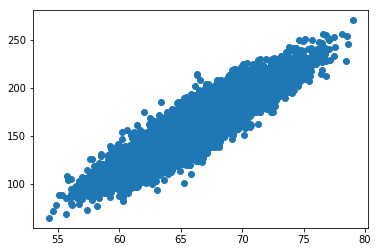

In [103]:
# As datatypes as proper so we dnt have to change it
# Here our data is in same scale so we dont need to normalize that
plt.scatter(df["Height"], df["Weight"])

Text(0.5, 1.0, 'Height bins')

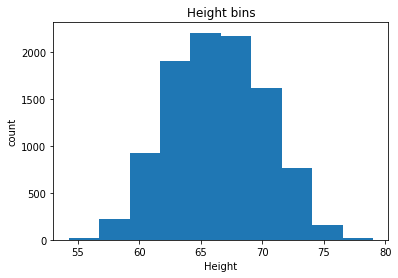

In [104]:
# We can see Height binning.
plt.hist(df["Height"])
# set x/y labels and plot title
plt.xlabel("Height")
plt.ylabel("count")
plt.title("Height bins")

Text(0.5, 1.0, 'Weight bins')

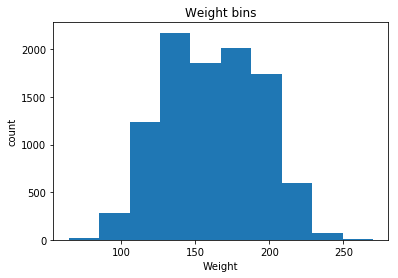

In [105]:
plt.hist(df["Weight"])
plt.xlabel("Weight")
plt.ylabel("count")
plt.title("Weight bins")

In [106]:
# Lets try to bin our data. Binning means converting our continous data into groups. 
# Lets say we divide our data in three group tall, medium, short
bins = np.linspace(min(df["Height"]), max(df["Height"]), 4)

In [107]:
bins

array([54.26313333, 62.50833633, 70.75353934, 78.99874235])

In [108]:
group_names = ["short", "medium", "tall"]

In [109]:
df['height-binned'] = pd.cut(df['Height'], bins, labels=group_names, include_lowest=True )
df[['Height','height-binned']].head(200)

,Height,height-binned
0,73.847017,tall
1,68.781904,medium
2,66.366208,medium
3,71.730978,tall
4,69.881796,medium
5,66.366208,medium
6,68.785081,medium
7,68.348516,medium
8,67.018950,medium
9,66.366208,medium


In [110]:
df.groupby("height-binned").count() # total number of bins

,Gender,Height,Weight
height-binned,,,
short,1723,1723,1723
medium,6868,6868,6868
tall,1409,1409,1409


In [111]:
df["height-binned"].value_counts()

medium    6868
short     1723
tall      1409
Name: height-binned, dtype: int64

Text(0.5, 1.0, 'height bins')

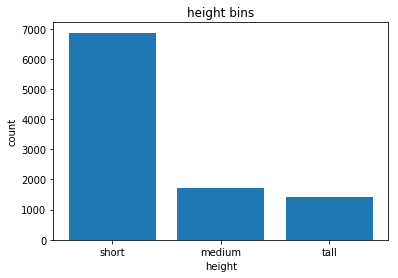

In [112]:
plt.bar(group_names, df["height-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("height")
plt.ylabel("count")
plt.title("height bins")

In [113]:
df.head() # Here you can see we have Gender column as first column, generally we make target column s last
# Lets shift it to last columns

,Gender,Height,Weight,height-binned
0,Male,73.847017,241.893563,tall
1,Male,68.781904,161.432826,medium
2,Male,66.366208,212.740856,medium
3,Male,71.730978,220.042470,tall
4,Male,69.881796,206.349801,medium


In [114]:
df_new = pd.concat([df.iloc[:, 1:4], df.iloc[:, 0]], axis = 1)

In [115]:
df_new.head() # So now Gender column is the last one

,Height,Weight,height-binned,Gender
0,73.847017,241.893563,tall,Male
1,68.781904,161.432826,medium,Male
2,66.366208,212.740856,medium,Male
3,71.730978,220.042470,tall,Male
4,69.881796,206.349801,medium,Male


In [116]:
# Now can you see any problem in the dataset???
# As we already in our tutorial discussed that model understand only integer values. So we need to change our
# height-binned and Gender column to dummy variables
dummy_height = pd.get_dummies(df["height-binned"])
dummy_height.head()

,short,medium,tall
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [117]:
 # Now we need to merge this dummy variable to our dataset
df_new = pd.concat([df_new, dummy_height], axis = 1)
df_new.head()

,Height,Weight,height-binned,Gender,short,medium,tall
0,73.847017,241.893563,tall,Male,0,0,1
1,68.781904,161.432826,medium,Male,0,1,0
2,66.366208,212.740856,medium,Male,0,1,0
3,71.730978,220.042470,tall,Male,0,0,1
4,69.881796,206.349801,medium,Male,0,1,0


In [118]:
# Now we already added the dummy variables for height-binned so now we can remove this column
df_new.drop("height-binned", axis=1, inplace=True)

In [119]:
df_new.head()

,Height,Weight,Gender,short,medium,tall
0,73.847017,241.893563,Male,0,0,1
1,68.781904,161.432826,Male,0,1,0
2,66.366208,212.740856,Male,0,1,0
3,71.730978,220.042470,Male,0,0,1
4,69.881796,206.349801,Male,0,1,0


In [122]:
# Lets do same for Gender
dummy_gender = pd.get_dummies(df["Gender"])

In [124]:
dummy_gender.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [126]:
df_new = pd.concat([df_new, dummy_gender], axis = 1)

In [127]:
df_new.head()

,Height,Weight,Gender,short,medium,tall,Female,Male
0,73.847017,241.893563,Male,0,0,1,0,1
1,68.781904,161.432826,Male,0,1,0,0,1
2,66.366208,212.740856,Male,0,1,0,0,1
3,71.730978,220.042470,Male,0,0,1,0,1
4,69.881796,206.349801,Male,0,1,0,0,1


In [129]:
# now lets delete Gender columns
df_new.drop("Gender", axis = 1, inplace = True)

In [130]:
df_new.head()

,Height,Weight,short,medium,tall,Female,Male
0,73.847017,241.893563,0,0,1,0,1
1,68.781904,161.432826,0,1,0,0,1
2,66.366208,212.740856,0,1,0,0,1
3,71.730978,220.042470,0,0,1,0,1
4,69.881796,206.349801,0,1,0,0,1


In [131]:
# So finally our dataset is ready. DATA WRANGLING PROCESS DONE !!!

<h2>Now lets do some exploratory dataanalysis</h2>

In [132]:
df_new.describe() # it will show the general statistical summary. but short,medium,tall, female, male 
# are our dummy variables. So we need to exclude them befor this summary.

,Height,Weight,short,medium,tall,Female,Male
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.366208,161.432826,0.17230,0.686800,0.140900,0.500000,0.500000
std,3.846226,32.104730,0.37766,0.463818,0.347936,0.500025,0.500025
min,54.263133,64.700127,0.00000,0.000000,0.000000,0.000000,0.000000
25%,63.509087,135.818051,0.00000,0.000000,0.000000,0.000000,0.000000
50%,66.319161,161.212928,0.00000,1.000000,0.000000,0.500000,0.500000
75%,69.169753,187.146757,0.00000,1.000000,0.000000,1.000000,1.000000
max,78.998742,269.989699,1.00000,1.000000,1.000000,1.000000,1.000000


In [138]:
df_new[["Height", "Weight"]].describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366208,161.432826
std,3.846226,32.104730
min,54.263133,64.700127
25%,63.509087,135.818051
50%,66.319161,161.212928
75%,69.169753,187.146757
max,78.998742,269.989699


In [139]:
df_new[["Height", "Weight"]].corr() # using correlation we can see height and weight as strongly related.
# but how they are related?

,Height,Weight
Height,1.000000,0.924448
Weight,0.924448,1.000000


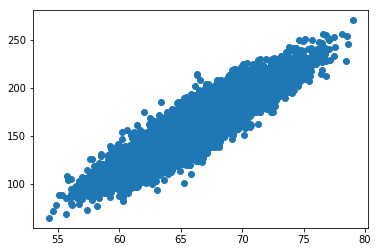

In [167]:
# We will plot a visualization between height and weight to check what kind of relation they have 
# e.g. linear or non linear

plt.scatter(df["Height"], df["Weight"])

<h2> Now lets do some regression </h2>

In [145]:
# As we know these two varibles(height, weight) as linearly related to eachother. So linear regression model
# will be a good choice for the model. To create a linear regression model, lets import new library sklearn

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
lm = LinearRegression()

In [193]:
X = df[["Height"]]
y = df["Weight"]

In [194]:
# Here lets break out data into two categories training and test. usually test should be only 25-30% of total data
# We are doing this so that we can compare the values of or predicted values to existing values
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [196]:
# So you can see our data is successully splited into test and train set.
print(X_train.count())
print(X_test.count())

Height    6666
dtype: int64
Height    3334
dtype: int64


In [197]:
# So now we will first train our model with train data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
lm.coef_

array([7.72022984])

In [199]:
lm.intercept_

-350.93811231904664

In [200]:
# in.a equation of line Y = mx+c
# coef_ = m & intercept = c
# New equation will be
# y = 7.72022984 * x + (350.93811231904664)

In [201]:
# Lets predict the value of all the given values
y_pred = lm.predict(X_test)

(0, 280.04612756597584)

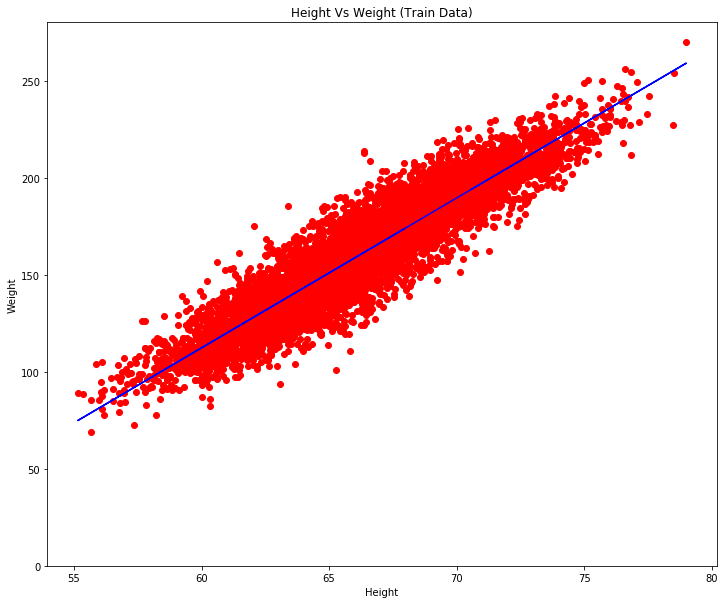

In [209]:
# Lets first draw visualizaiton between training set. We will plot scatter for real values and a regression line
# for predicted values for training set only(Not for test data).

width = 12 # width of the visualization
height = 10 # height of the visualization
plt.figure(figsize=(width, height))
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lm.predict(X_train), color='blue')
plt.title('Height Vs Weight (Train Data)') # Visualization title
plt.xlabel('Height') # x-axis label
plt.ylabel('Weight') # y-axis label
plt.ylim(0,) # settin the minimum value of y axis.

In [205]:
# So in the above example you can see, the red dots are actuall values which is present in our dataset.
# Blue line is the predicted values. So you can see values are uniformly scattered around line. So out line is good.

In [ ]:
# So now finally we have plotted our regression. Blue line is prediction and red are actual values. 